In [1]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import tensorflow as tf
#import tensorflow.keras.backend as K
#from sklearn.metrics import confusion_matrix
from keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
#from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, LeakyReLU
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D
#from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPooling2D
from keras.layers import MaxPool2D
import tensorflow.keras.metrics as Metrics

In [2]:
np.random.seed(0)
tf.random.set_seed(0)

In [3]:
from google.colab import files #add .json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [5]:
import zipfile
import os
from kaggle.cli import main
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [6]:
!kaggle datasets download -d harshart/balanced-plant-dataset

100% 1.17G/1.17G [00:59<00:00, 24.3MB/s]
100% 1.17G/1.17G [00:59<00:00, 21.1MB/s]


In [7]:
zip_ref = zipfile.ZipFile('balanced-plant-dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [8]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import itertools
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# **Strawberry**

In [119]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"

train_dir = data_dir + "/Training/Strawberry"
valid_dir = data_dir + "/Testing/Strawberry"

In [120]:
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= valid_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 3598 files belonging to 2 classes.
Using 2879 files for training.
Found 3598 files belonging to 2 classes.
Using 719 files for validation.
Found 900 files belonging to 2 classes.


In [121]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [122]:
from keras.applications.vgg16 import VGG16
def define_modelavg():
    # load model
    model_sb_avg = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_sb_avg.layers:
        layer.trainable = False
    # add new classifier layers
    avgpool1 = tf.keras.layers.GlobalAveragePooling2D()(model_sb_avg.layers[-1].output)

    class1 = Dense(8, activation='relu', kernel_initializer='he_uniform')(avgpool1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model_sb_avg = Model(inputs=model_sb_avg.inputs, outputs=output)
    return model_sb_avg

In [123]:
model_sb_avg = define_modelavg()
model_sb_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_sb_avg.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0  

In [124]:
%%time
epochsteps=len(train_set);epochs =20;valsteps=len(valid_set);teststeps=len(test_set)
# fit model
history = model_sb_avg.fit(train_set, steps_per_epoch=epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, epochs=epochs, verbose=1)


Epoch 1/20
90/90 [==============================] - 7s 64ms/step - loss: 0.4354 - accuracy: 0.8902 - val_loss: 0.2373 - val_accuracy: 0.9777
Epoch 2/20
90/90 [==============================] - 6s 60ms/step - loss: 0.1578 - accuracy: 0.9826 - val_loss: 0.1208 - val_accuracy: 0.9791
Epoch 3/20
90/90 [==============================] - 6s 61ms/step - loss: 0.0926 - accuracy: 0.9833 - val_loss: 0.0799 - val_accuracy: 0.9903
Epoch 4/20
90/90 [==============================] - 6s 60ms/step - loss: 0.0654 - accuracy: 0.9871 - val_loss: 0.0612 - val_accuracy: 0.9944
Epoch 5/20
90/90 [==============================] - 7s 74ms/step - loss: 0.0526 - accuracy: 0.9871 - val_loss: 0.0512 - val_accuracy: 0.9930
Epoch 6/20
90/90 [==============================] - 5s 59ms/step - loss: 0.0427 - accuracy: 0.9889 - val_loss: 0.0439 - val_accuracy: 0.9944
Epoch 7/20
90/90 [==============================] - 7s 73ms/step - loss: 0.0372 - accuracy: 0.9906 - val_loss: 0.0378 - val_accuracy: 0.9972
Epoch 8/20
90

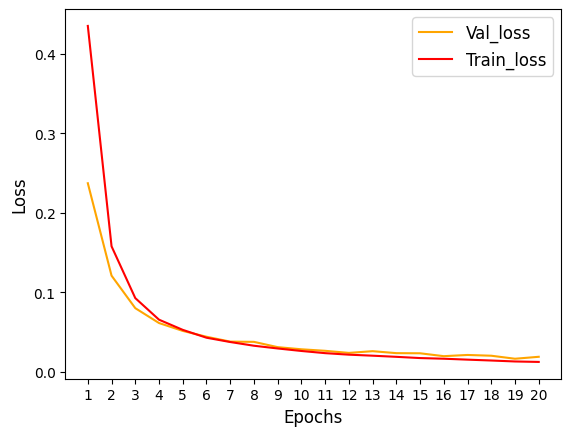

In [130]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
# plt.plot(history.history['accuracy'], color = 'green')
# plt.plot(history.history['val_accuracy'], color = 'blue')
plt.legend(['Val_loss','Train_loss'],fontsize=12)
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xticks(e,labels,fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [126]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model_sb_avg.predict(x),1).numpy())

1/1 [==============================] - 0s 138ms/step


In [127]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [128]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='macro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='macro') * 100))
print("F1 Score        : {:.2f} %".format(f1_score(labels, predictions, average='macro') * 100))

Train Accuracy  : 99.79 %
Test Accuracy   : 99.11 %
Precision Score : 99.11 %
Recall Score    : 99.11 %
F1 Score        : 99.11 %


<Figure size 200x200 with 0 Axes>

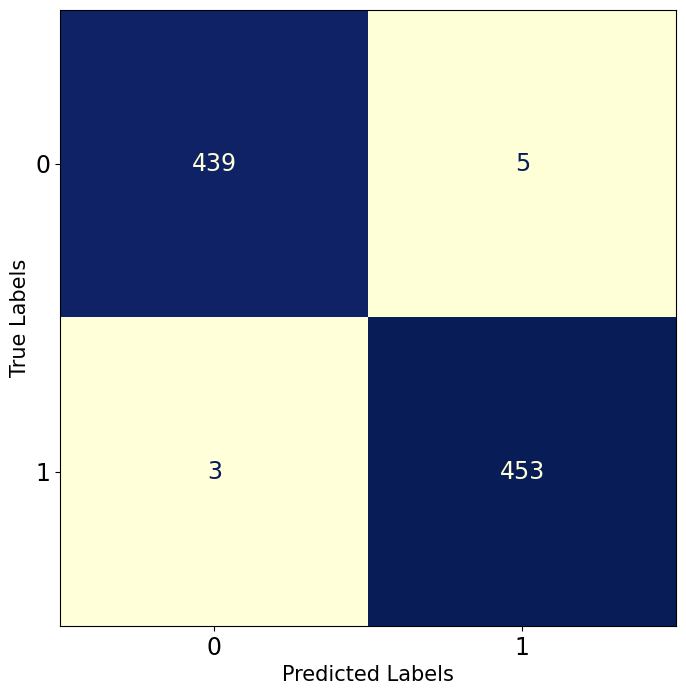

In [129]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
plt.rcParams.update({'font.size': 17})
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
# plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels',fontsize = 15)
plt.ylabel('True Labels', fontsize = 15)
plt.show()

# Cherry

In [28]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"
train_cherry_dir = data_dir + "/Training/Cherry"
valid_cherry_dir = data_dir + "/Testing/Cherry"


In [29]:
%%time
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_cherry_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_cherry_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= valid_cherry_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 3509 files belonging to 2 classes.
Using 2808 files for training.
Found 3509 files belonging to 2 classes.
Using 701 files for validation.
Found 877 files belonging to 2 classes.
CPU times: user 307 ms, sys: 123 ms, total: 430 ms
Wall time: 358 ms


In [30]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [31]:
# vgg16 with globalavgpooling
from keras.layers import GlobalAveragePooling2D

from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_modelavg():
    # load model
    model = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    #flat1 = Flatten()(model.layers[-1].output)
    avgpool1=GlobalAveragePooling2D()(model.layers[-1].output)
    #flat1 = Flatten()(avgpool1)

    class1 = Dense(8, activation='relu', kernel_initializer='he_uniform')(avgpool1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    return model

In [32]:
modelavg = define_modelavg()
modelavg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelavg.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [33]:
%%time
epochsteps=len(train_set);epochs =20;valsteps=len(valid_set);teststeps=len(test_set)
# fit model
history = modelavg.fit(train_set, steps_per_epoch=epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, epochs=epochs, verbose=1)


Epoch 1/20
88/88 [==============================] - 10s 102ms/step - loss: 0.4011 - accuracy: 0.8889 - val_loss: 0.1960 - val_accuracy: 0.9872
Epoch 2/20
88/88 [==============================] - 7s 77ms/step - loss: 0.1387 - accuracy: 0.9858 - val_loss: 0.0936 - val_accuracy: 0.9900
Epoch 3/20
88/88 [==============================] - 6s 66ms/step - loss: 0.0758 - accuracy: 0.9904 - val_loss: 0.0547 - val_accuracy: 0.9957
Epoch 4/20
88/88 [==============================] - 6s 68ms/step - loss: 0.0496 - accuracy: 0.9957 - val_loss: 0.0372 - val_accuracy: 0.9957
Epoch 5/20
88/88 [==============================] - 7s 74ms/step - loss: 0.0363 - accuracy: 0.9972 - val_loss: 0.0269 - val_accuracy: 0.9971
Epoch 6/20
88/88 [==============================] - 5s 56ms/step - loss: 0.0277 - accuracy: 0.9972 - val_loss: 0.0210 - val_accuracy: 0.9971
Epoch 7/20
88/88 [==============================] - 5s 58ms/step - loss: 0.0226 - accuracy: 0.9982 - val_loss: 0.0169 - val_accuracy: 0.9971
Epoch 8/20


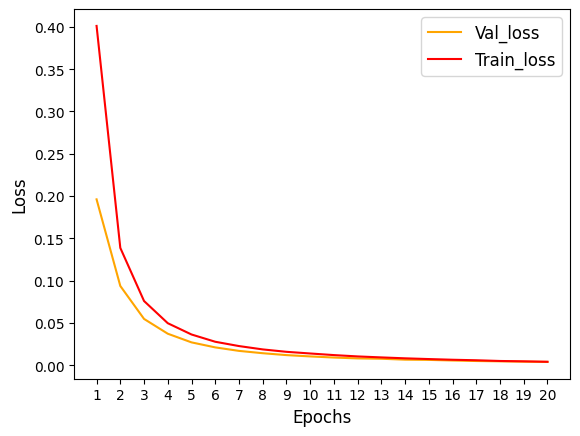

In [35]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
# plt.plot(history.history['accuracy'], color = 'green')
# plt.plot(history.history['val_accuracy'], color = 'blue')
plt.legend(['Val_loss','Train_loss'],fontsize=12)
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xticks(e,labels,fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [37]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(modelavg.predict(x),1).numpy())

1/1 [==============================] - 2s 2s/step


In [38]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [39]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='macro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='macro') * 100))
print("F1 Score        : {:.2f} %".format(f1_score(labels, predictions, average='macro') * 100))

Train Accuracy  : 99.96 %
Test Accuracy   : 100.00 %
Precision Score : 100.00 %
Recall Score    : 100.00 %
F1 Score        : 100.00 %


<Figure size 200x200 with 0 Axes>

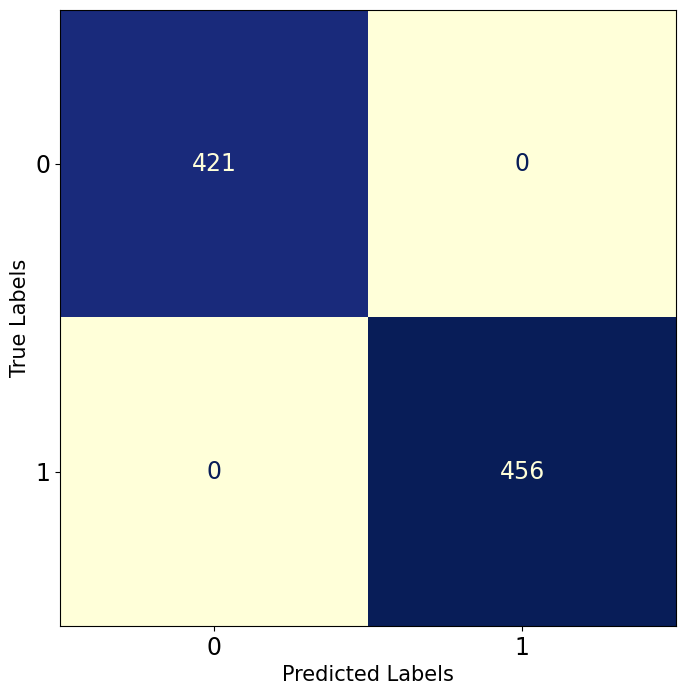

In [40]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
plt.rcParams.update({'font.size': 17})
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
# plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels',fontsize = 15)
plt.ylabel('True Labels', fontsize = 15)
plt.show()

# **Peach**

In [42]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"
train_peach_dir = data_dir + "/Training/Peach"
valid_peach_dir = data_dir + "/Testing/Peach"


In [43]:
%%time
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_peach_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_peach_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= valid_peach_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 3566 files belonging to 2 classes.
Using 2853 files for training.
Found 3566 files belonging to 2 classes.
Using 713 files for validation.
Found 891 files belonging to 2 classes.
CPU times: user 311 ms, sys: 117 ms, total: 428 ms
Wall time: 358 ms


In [44]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [45]:
#VGG16 with average pooling layer
#accuray = 98.76
from keras.layers import GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16
from keras.models import Model
def define_peachmodelavg():
    # load model
    model_p = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_p.layers:
        layer.trainable = False
    # add new classifier layers
    #flat1 = Flatten()(model.layers[-1].output)
    avgpool1=GlobalAveragePooling2D()(model_p.layers[-1].output)

    class1 = Dense(8, activation='relu', kernel_initializer='he_uniform')(avgpool1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model_p = Model(inputs=model_p.inputs, outputs=output)
    return model_p

In [46]:
modelavg_p = define_peachmodelavg()
modelavg_p.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelavg_p.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [47]:
%%time
epochsteps=len(train_set);epochs =20;valsteps=len(valid_set);teststeps=len(test_set)
# fit model
history = modelavg_p.fit(train_set, steps_per_epoch=epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, epochs=epochs, verbose=1)


Epoch 1/20
90/90 [==============================] - 9s 89ms/step - loss: 0.5643 - accuracy: 0.7543 - val_loss: 0.3886 - val_accuracy: 0.9383
Epoch 2/20
90/90 [==============================] - 7s 76ms/step - loss: 0.3006 - accuracy: 0.9352 - val_loss: 0.2274 - val_accuracy: 0.9495
Epoch 3/20
90/90 [==============================] - 8s 79ms/step - loss: 0.1954 - accuracy: 0.9558 - val_loss: 0.1613 - val_accuracy: 0.9593
Epoch 4/20
90/90 [==============================] - 6s 60ms/step - loss: 0.1462 - accuracy: 0.9671 - val_loss: 0.1249 - val_accuracy: 0.9705
Epoch 5/20
90/90 [==============================] - 6s 62ms/step - loss: 0.1164 - accuracy: 0.9734 - val_loss: 0.1026 - val_accuracy: 0.9734
Epoch 6/20
90/90 [==============================] - 7s 78ms/step - loss: 0.1017 - accuracy: 0.9734 - val_loss: 0.0897 - val_accuracy: 0.9804
Epoch 7/20
90/90 [==============================] - 5s 58ms/step - loss: 0.0859 - accuracy: 0.9790 - val_loss: 0.0790 - val_accuracy: 0.9804
Epoch 8/20
90

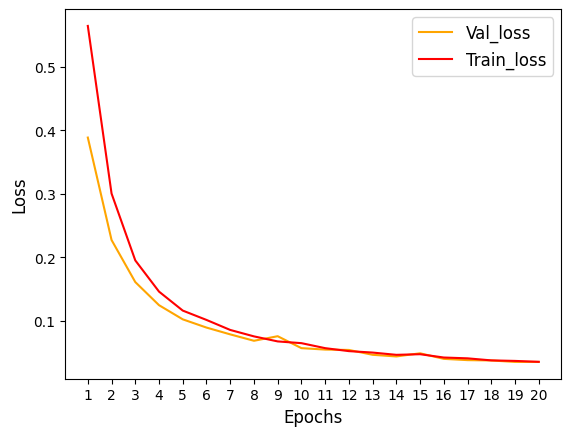

In [48]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
# plt.plot(history.history['accuracy'], color = 'green')
# plt.plot(history.history['val_accuracy'], color = 'blue')
plt.legend(['Val_loss','Train_loss'],fontsize=12)
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xticks(e,labels,fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [49]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(modelavg_p.predict(x),1).numpy())

1/1 [==============================] - 2s 2s/step


In [50]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [51]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='macro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='macro') * 100))
print("F1 Score        : {:.2f} %".format(f1_score(labels, predictions, average='macro') * 100))

Train Accuracy  : 99.09 %
Test Accuracy   : 98.99 %
Precision Score : 99.01 %
Recall Score    : 98.97 %
F1 Score        : 98.99 %


<Figure size 200x200 with 0 Axes>

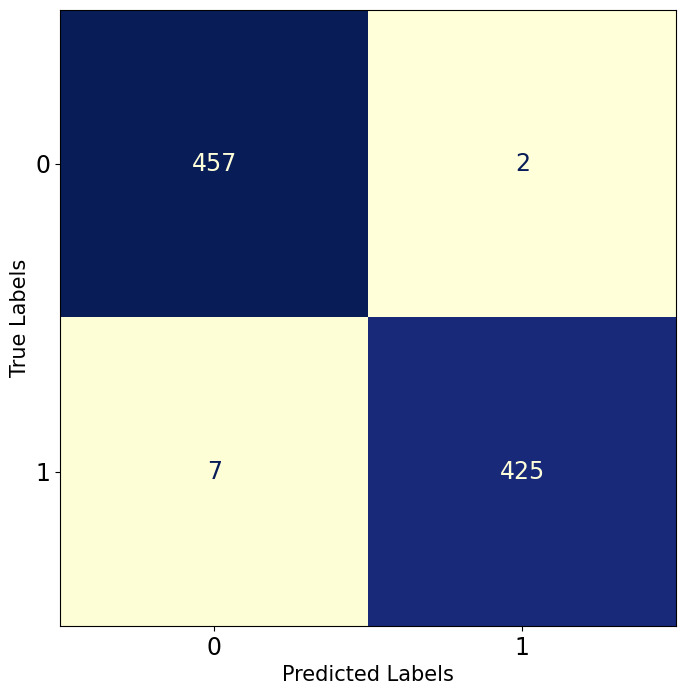

In [52]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
# plt.rcParams.update({'font.size': 17})
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
# plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels',fontsize = 15)
plt.ylabel('True Labels', fontsize = 15)
plt.show()

# **Bell Pepper**

In [53]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"

train_bp_dir = data_dir + "/Training/Bell Pepper"
test_bp_dir = data_dir + "/Testing/Bell Pepper"


In [54]:
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_bp_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_bp_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= test_bp_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 3901 files belonging to 2 classes.
Using 3121 files for training.
Found 3901 files belonging to 2 classes.
Using 780 files for validation.
Found 975 files belonging to 2 classes.


In [55]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [56]:
# average pooling

from keras.layers import GlobalAveragePooling2D

def define_modelavg():
    # load model
    model_bp_avg = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_bp_avg.layers:
        layer.trainable = False
    # add new classifier layers
    #flat1 = Flatten()(model.layers[-1].output)
    avgpool1 = GlobalAveragePooling2D()(model_bp_avg.layers[-1].output)
    #flat1 = Flatten()(avgpool1)

    class1 = Dense(8, activation='relu', kernel_initializer='he_uniform')(avgpool1)
    output = Dense(2, activation='softmax')(class1)
    # define new model
    model_bp_avg = Model(inputs=model_bp_avg.inputs, outputs=output)
    return model_bp_avg

In [57]:
model_bp_avg = define_modelavg()
model_bp_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_bp_avg.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [58]:
epochsteps=len(train_set);e=20;valsteps=len(valid_set);teststeps=len(test_set)

history = model_bp_avg.fit(train_set, steps_per_epoch=epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, epochs=e, verbose=1)


Epoch 1/20
98/98 [==============================] - 10s 87ms/step - loss: 0.5552 - accuracy: 0.7844 - val_loss: 0.4552 - val_accuracy: 0.8295
Epoch 2/20
98/98 [==============================] - 7s 73ms/step - loss: 0.3786 - accuracy: 0.8542 - val_loss: 0.3761 - val_accuracy: 0.8397
Epoch 3/20
98/98 [==============================] - 8s 73ms/step - loss: 0.3193 - accuracy: 0.8770 - val_loss: 0.3325 - val_accuracy: 0.8564
Epoch 4/20
98/98 [==============================] - 7s 65ms/step - loss: 0.2889 - accuracy: 0.8866 - val_loss: 0.2979 - val_accuracy: 0.8795
Epoch 5/20
98/98 [==============================] - 6s 58ms/step - loss: 0.2702 - accuracy: 0.8907 - val_loss: 0.3028 - val_accuracy: 0.8641
Epoch 6/20
98/98 [==============================] - 7s 71ms/step - loss: 0.2558 - accuracy: 0.8933 - val_loss: 0.2794 - val_accuracy: 0.8885
Epoch 7/20
98/98 [==============================] - 6s 59ms/step - loss: 0.2446 - accuracy: 0.9023 - val_loss: 0.2625 - val_accuracy: 0.8962
Epoch 8/20
9

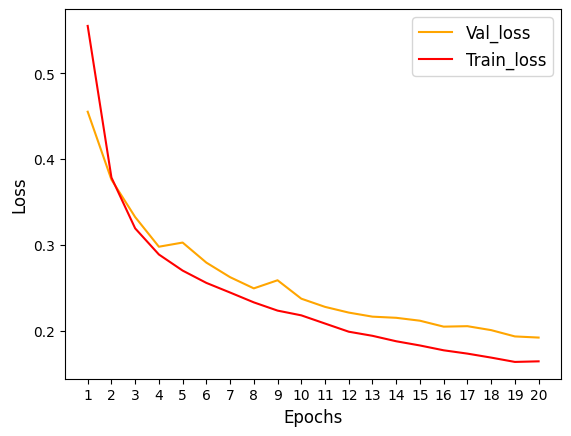

In [59]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
# plt.plot(history.history['accuracy'], color = 'green')
# plt.plot(history.history['val_accuracy'], color = 'blue')
plt.legend(['Val_loss','Train_loss'],fontsize=12)
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xticks(e,labels,fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [60]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model_bp_avg.predict(x),1).numpy())

1/1 [==============================] - 0s 176ms/step


In [61]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [62]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='macro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='macro') * 100))
print("F1 Score        : {:.2f} %".format(f1_score(labels, predictions, average='macro') * 100))

Train Accuracy  : 93.30 %
Test Accuracy   : 93.03 %
Precision Score : 93.09 %
Recall Score    : 92.99 %
F1 Score        : 93.02 %


<Figure size 200x200 with 0 Axes>

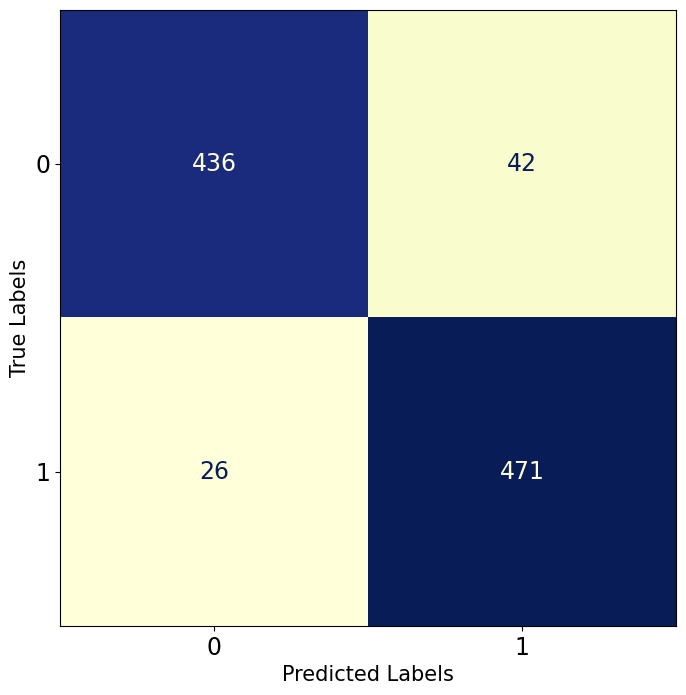

In [63]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
plt.rcParams.update({'font.size': 17})
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
# plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels',fontsize = 15)
plt.ylabel('True Labels', fontsize = 15)
plt.show()

# **Grape**

In [64]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"

train_g_dir = data_dir + "/Training/Grape"
test_g_dir = data_dir + "/Testing/Grape"

In [65]:
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_g_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_g_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= test_g_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 7222 files belonging to 4 classes.
Using 5778 files for training.
Found 7222 files belonging to 4 classes.
Using 1444 files for validation.
Found 1805 files belonging to 4 classes.


In [66]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [67]:

def define_modelavg():
    # load model
    model_g_avg = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_g_avg.layers:
        layer.trainable = False
    # add new classifier layers
    avgpool1 = tf.keras.layers.GlobalAveragePooling2D()(model_g_avg.layers[-1].output)

    class1 = Dense(10, activation='relu', kernel_initializer='he_uniform')(avgpool1)
    output = Dense(4, activation='softmax')(class1)
    # define new model
    model_g_avg = Model(inputs=model_g_avg.inputs, outputs=output)
    return model_g_avg

In [68]:
model_g_avg = define_modelavg()
model_g_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Metrics.Precision(), Metrics.Recall()])
model_g_avg.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [69]:
epochsteps=len(train_set);e=20;valsteps=len(valid_set);teststeps=len(test_set)
# fit model
history = model_g_avg.fit(train_set, steps_per_epoch=epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, epochs=e, verbose=1)


Epoch 1/20
181/181 [==============================] - 14s 68ms/step - loss: 0.8430 - accuracy: 0.7079 - precision: 0.9078 - recall: 0.3527 - val_loss: 0.5476 - val_accuracy: 0.8366 - val_precision: 0.9009 - val_recall: 0.7244
Epoch 2/20
181/181 [==============================] - 14s 75ms/step - loss: 0.4497 - accuracy: 0.8487 - precision: 0.8882 - recall: 0.7812 - val_loss: 0.3786 - val_accuracy: 0.8691 - val_precision: 0.8940 - val_recall: 0.8352
Epoch 3/20
181/181 [==============================] - 11s 57ms/step - loss: 0.3509 - accuracy: 0.8690 - precision: 0.8832 - recall: 0.8403 - val_loss: 0.3256 - val_accuracy: 0.8809 - val_precision: 0.8943 - val_recall: 0.8615
Epoch 4/20
181/181 [==============================] - 11s 59ms/step - loss: 0.3049 - accuracy: 0.8802 - precision: 0.8906 - recall: 0.8647 - val_loss: 0.2898 - val_accuracy: 0.8871 - val_precision: 0.8923 - val_recall: 0.8774
Epoch 5/20
181/181 [==============================] - 11s 61ms/step - loss: 0.2775 - accuracy: 0

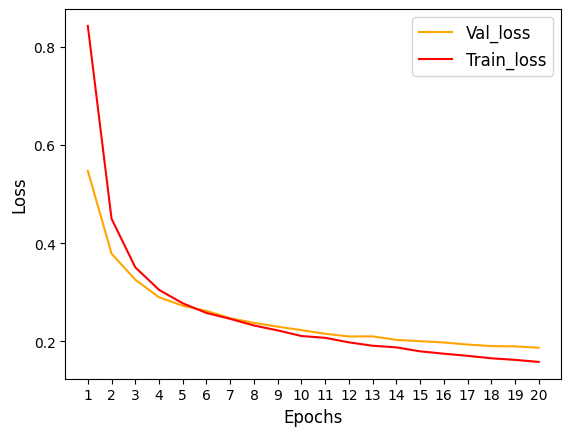

In [70]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
# plt.plot(history.history['accuracy'], color = 'green')
# plt.plot(history.history['val_accuracy'], color = 'blue')
plt.legend(['Val_loss','Train_loss'],fontsize=12)
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xticks(e,labels,fontsize = 10)
plt.yticks(fontsize=10)
plt.show()

In [71]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model_g_avg.predict(x),1).numpy())

1/1 [==============================] - 0s 207ms/step


In [72]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [73]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='macro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='macro') * 100))
print("F1 Score        : {:.2f} %".format(f1_score(labels, predictions, average='macro') * 100))

Train Accuracy  : 93.93 %
Test Accuracy   : 92.19 %
Precision Score : 92.62 %
Recall Score    : 92.56 %
F1 Score        : 92.55 %


<Figure size 200x200 with 0 Axes>

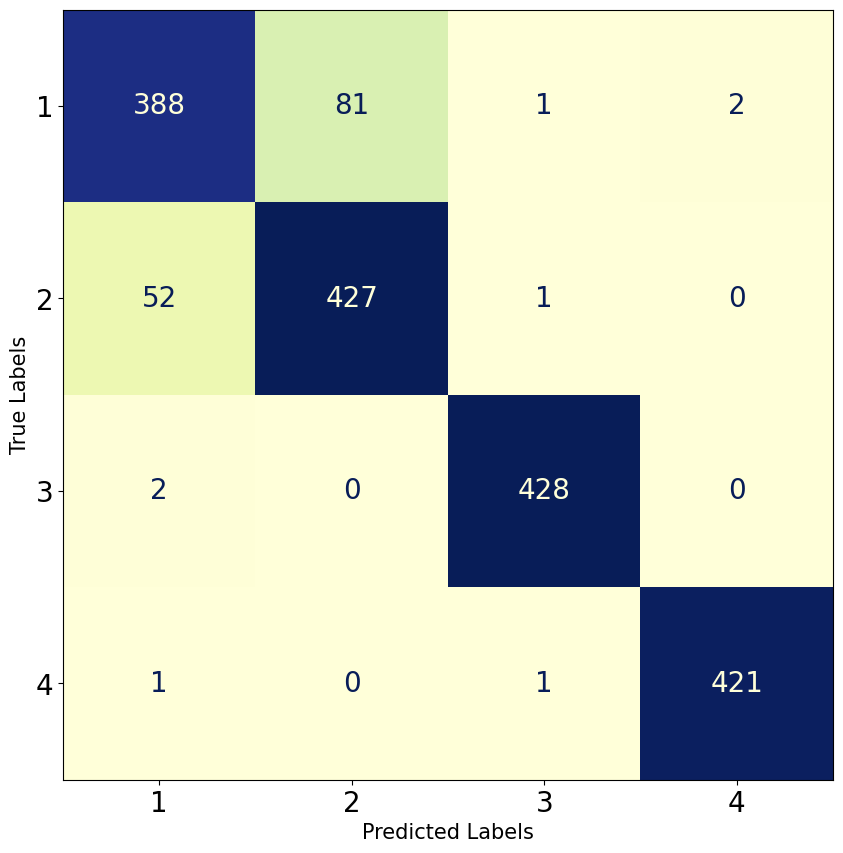

In [74]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
plt.rcParams.update({'font.size': 20})
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,5)))
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
# plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels',fontsize = 15)
plt.ylabel('True Labels',fontsize = 15)
plt.show()

# **Corn**

In [75]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"

train_corn_dir = data_dir + "/Training/Corn"
test_corn_dir = data_dir + "/Testing/Corn"

In [76]:
%%time
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_corn_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_corn_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= test_corn_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 7316 files belonging to 4 classes.
Using 5853 files for training.
Found 7316 files belonging to 4 classes.
Using 1463 files for validation.
Found 1829 files belonging to 4 classes.
CPU times: user 527 ms, sys: 239 ms, total: 766 ms
Wall time: 618 ms


In [77]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [78]:
# from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D

def define_modelavg():
    # load model
    model_c_avg = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_c_avg.layers:
        layer.trainable = False
    # add new classifier layers
    avgpool1 = tf.keras.layers.GlobalAveragePooling2D()(model_c_avg.layers[-1].output)

    class1 = Dense(10, activation='relu', kernel_initializer='he_uniform')(avgpool1)
    output = Dense(4, activation='softmax')(class1)
    # define new model
    model_c_avg = Model(inputs=model_c_avg.inputs, outputs=output)
    return model_c_avg

In [79]:
model_c_avg = define_modelavg()
model_c_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_c_avg.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [80]:
epochsteps=len(train_set);epochs =20;valsteps=len(valid_set);teststeps=len(test_set)
# fit model
history = model_c_avg.fit(train_set, steps_per_epoch=epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, epochs=epochs, verbose=1)


Epoch 1/20
183/183 [==============================] - 14s 67ms/step - loss: 0.8460 - accuracy: 0.6779 - val_loss: 0.4848 - val_accuracy: 0.8694
Epoch 2/20
183/183 [==============================] - 11s 59ms/step - loss: 0.3553 - accuracy: 0.9081 - val_loss: 0.2854 - val_accuracy: 0.9200
Epoch 3/20
183/183 [==============================] - 10s 55ms/step - loss: 0.2456 - accuracy: 0.9284 - val_loss: 0.2207 - val_accuracy: 0.9385
Epoch 4/20
183/183 [==============================] - 11s 57ms/step - loss: 0.2005 - accuracy: 0.9370 - val_loss: 0.1926 - val_accuracy: 0.9481
Epoch 5/20
183/183 [==============================] - 11s 57ms/step - loss: 0.1775 - accuracy: 0.9453 - val_loss: 0.1636 - val_accuracy: 0.9528
Epoch 6/20
183/183 [==============================] - 11s 57ms/step - loss: 0.1602 - accuracy: 0.9475 - val_loss: 0.1491 - val_accuracy: 0.9576
Epoch 7/20
183/183 [==============================] - 11s 60ms/step - loss: 0.1489 - accuracy: 0.9523 - val_loss: 0.1419 - val_accuracy:

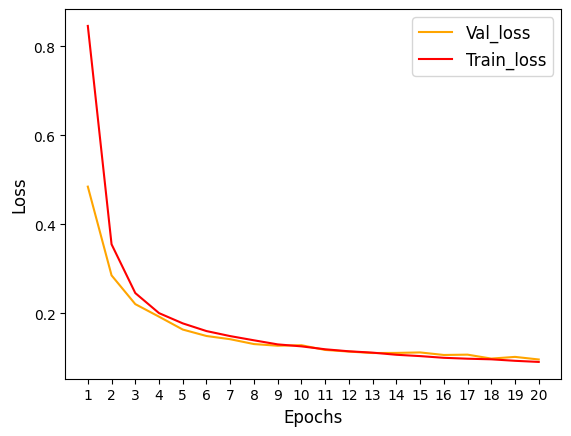

In [81]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
# plt.plot(history.history['accuracy'], color = 'green')
# plt.plot(history.history['val_accuracy'], color = 'blue')
plt.legend(['Val_loss','Train_loss'],fontsize=12)
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xticks(e,labels, fontsize=10)
plt.yticks(fontsize = 10)
plt.show()

In [82]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model_c_avg.predict(x),1).numpy())

1/1 [==============================] - 0s 139ms/step


In [83]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [84]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='macro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='macro') * 100))
print("F1 Score        : {:.2f} %".format(f1_score(labels, predictions, average='macro') * 100))

Train Accuracy  : 96.67 %
Test Accuracy   : 95.68 %
Precision Score : 95.69 %
Recall Score    : 95.45 %
F1 Score        : 95.53 %


<Figure size 200x200 with 0 Axes>

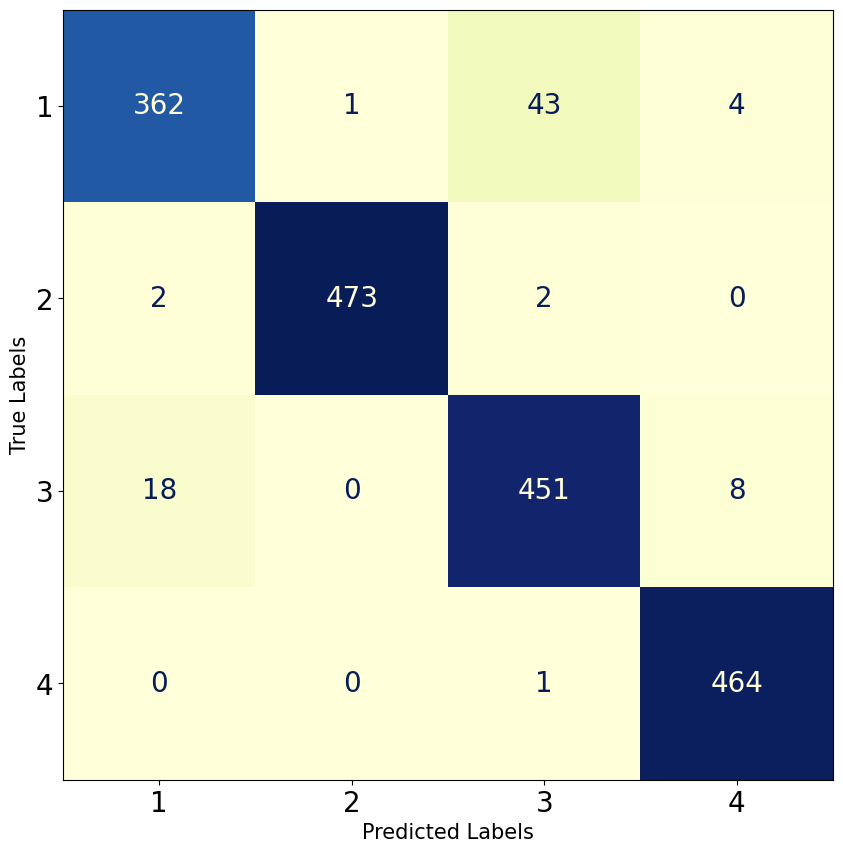

In [85]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
plt.rcParams.update({'font.size': 20})
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,5)))
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
# plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels',fontsize=15)
plt.ylabel('True Labels',fontsize=15)
plt.show()

# **Tomato**

In [86]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"

train_t_dir = data_dir + "/Training/Tomato"
test_t_dir = data_dir + "/Testing/Tomato"

In [87]:
%%time
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_t_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_t_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= test_t_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 18345 files belonging to 10 classes.
Using 14676 files for training.
Found 18345 files belonging to 10 classes.
Using 3669 files for validation.
Found 4585 files belonging to 10 classes.
CPU times: user 1.29 s, sys: 542 ms, total: 1.83 s
Wall time: 1.47 s


In [88]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [89]:

def define_modelavg():
    # load model
    model_t_avg = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_t_avg.layers:
        layer.trainable = False
    # add new classifier layers
    avgpool1 = tf.keras.layers.GlobalAveragePooling2D()(model_t_avg.layers[-1].output)

    class1 = Dense(32, activation='relu', kernel_initializer='he_uniform')(avgpool1)
    output = Dense(10, activation='softmax')(class1)
    # define new model
    model_t_avg = Model(inputs=model_t_avg.inputs, outputs=output)
    return model_t_avg

In [90]:
model_t_avg = define_modelavg()
model_t_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_t_avg.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [91]:
epochsteps=len(train_set);epochs=20;valsteps=len(valid_set);teststeps=len(test_set)
# fit model
history = model_t_avg.fit(train_set, steps_per_epoch = epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, epochs=epochs, verbose=1)


Epoch 1/20
459/459 [==============================] - 31s 65ms/step - loss: 1.5539 - accuracy: 0.5244 - val_loss: 1.0483 - val_accuracy: 0.7010
Epoch 2/20
459/459 [==============================] - 27s 59ms/step - loss: 0.9174 - accuracy: 0.7165 - val_loss: 0.7977 - val_accuracy: 0.7533
Epoch 3/20
459/459 [==============================] - 31s 67ms/step - loss: 0.7464 - accuracy: 0.7574 - val_loss: 0.6973 - val_accuracy: 0.7743
Epoch 4/20
459/459 [==============================] - 29s 62ms/step - loss: 0.6621 - accuracy: 0.7874 - val_loss: 0.6324 - val_accuracy: 0.7931
Epoch 5/20
459/459 [==============================] - 27s 59ms/step - loss: 0.6091 - accuracy: 0.8007 - val_loss: 0.5896 - val_accuracy: 0.8062
Epoch 6/20
459/459 [==============================] - 31s 68ms/step - loss: 0.5683 - accuracy: 0.8149 - val_loss: 0.5645 - val_accuracy: 0.8111
Epoch 7/20
459/459 [==============================] - 31s 67ms/step - loss: 0.5385 - accuracy: 0.8258 - val_loss: 0.5322 - val_accuracy:

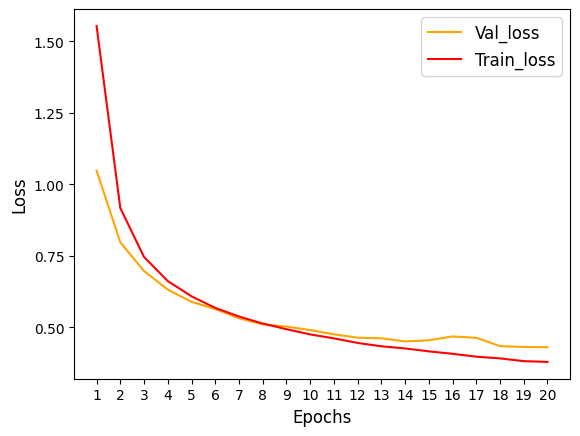

In [92]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
# plt.plot(history.history['accuracy'], color = 'green')
# plt.plot(history.history['val_accuracy'], color = 'blue')
plt.legend(['Val_loss','Train_loss'],fontsize=12)
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xticks(e,labels,fontsize=10)
plt.yticks(fontsize = 10)
plt.show()

In [93]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model_t_avg.predict(x),1).numpy())

1/1 [==============================] - 0s 138ms/step


In [94]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [95]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='macro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='macro') * 100))
print("F1 Score        : {:.2f} %".format(f1_score(labels, predictions, average='macro') * 100))

Train Accuracy  : 87.29 %
Test Accuracy   : 84.43 %
Precision Score : 84.45 %
Recall Score    : 84.52 %
F1 Score        : 84.31 %


<Figure size 200x200 with 0 Axes>

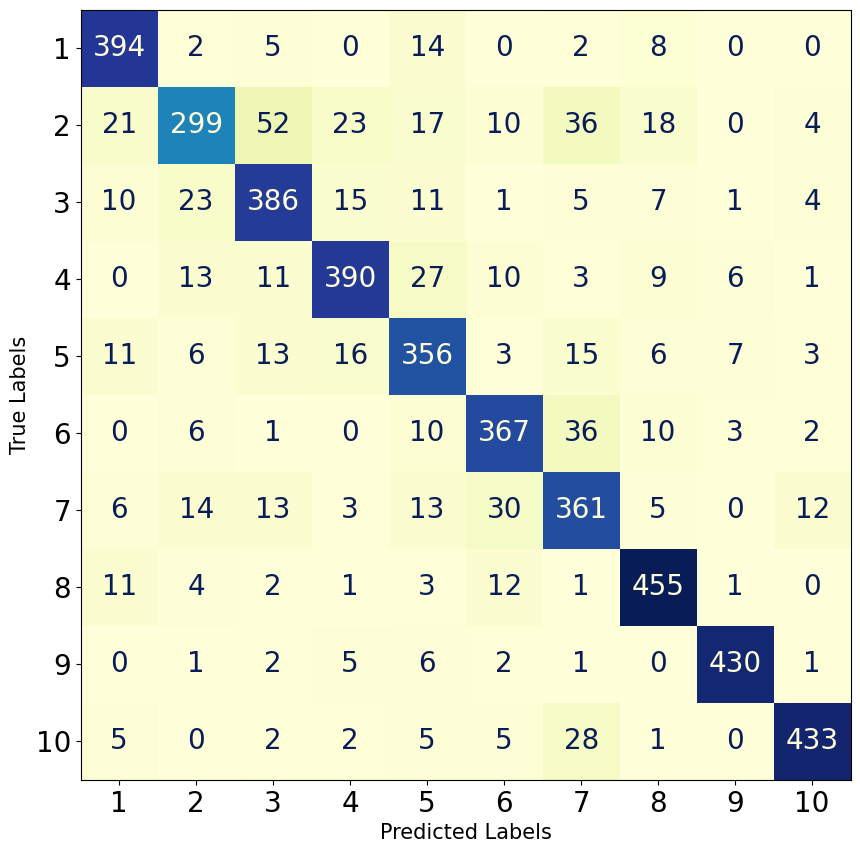

In [96]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
plt.rcParams.update({'font.size': 20})
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,11)))
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
# plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels',fontsize=15)
plt.ylabel('True Labels',fontsize=15)
plt.show()

# **Potato**

In [97]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"
train_potato_dir = data_dir + "/Training/Potato"
test_potato_dir = data_dir + "/Testing/Potato"


In [98]:
%%time
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_potato_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_potato_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= test_potato_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 5702 files belonging to 3 classes.
Using 4562 files for training.
Found 5702 files belonging to 3 classes.
Using 1140 files for validation.
Found 1426 files belonging to 3 classes.
CPU times: user 469 ms, sys: 134 ms, total: 603 ms
Wall time: 519 ms


In [99]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [100]:
#from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
def define_modelavg():
    # load model
    model_potato_avg = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_potato_avg.layers:
        layer.trainable = False
    # add new classifier layers
    avgpool1 = tf.keras.layers.GlobalAveragePooling2D()(model_potato_avg.layers[-1].output)

    class1 = Dense(10, activation='relu', kernel_initializer='he_uniform')(avgpool1)
    output = Dense(3, activation='softmax')(class1)
    # define new model
    model_potato_avg = Model(inputs=model_potato_avg.inputs, outputs=output)
    return model_potato_avg


In [101]:
model_potato_avg = define_modelavg()
model_potato_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_potato_avg.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [102]:
epochsteps=len(train_set);epochs =20;valsteps=len(valid_set);teststeps=len(test_set)
# fit model
history = model_potato_avg.fit(train_set, steps_per_epoch=epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, epochs=epochs, verbose=1)


Epoch 1/20
143/143 [==============================] - 10s 59ms/step - loss: 0.9111 - accuracy: 0.6394 - val_loss: 0.7193 - val_accuracy: 0.8044
Epoch 2/20
143/143 [==============================] - 9s 64ms/step - loss: 0.5696 - accuracy: 0.8582 - val_loss: 0.4749 - val_accuracy: 0.8684
Epoch 3/20
143/143 [==============================] - 9s 58ms/step - loss: 0.4063 - accuracy: 0.8880 - val_loss: 0.3683 - val_accuracy: 0.8939
Epoch 4/20
143/143 [==============================] - 8s 57ms/step - loss: 0.3255 - accuracy: 0.9099 - val_loss: 0.3109 - val_accuracy: 0.9035
Epoch 5/20
143/143 [==============================] - 9s 63ms/step - loss: 0.2817 - accuracy: 0.9171 - val_loss: 0.2763 - val_accuracy: 0.9061
Epoch 6/20
143/143 [==============================] - 9s 61ms/step - loss: 0.2526 - accuracy: 0.9215 - val_loss: 0.2550 - val_accuracy: 0.9167
Epoch 7/20
143/143 [==============================] - 8s 54ms/step - loss: 0.2299 - accuracy: 0.9263 - val_loss: 0.2337 - val_accuracy: 0.920

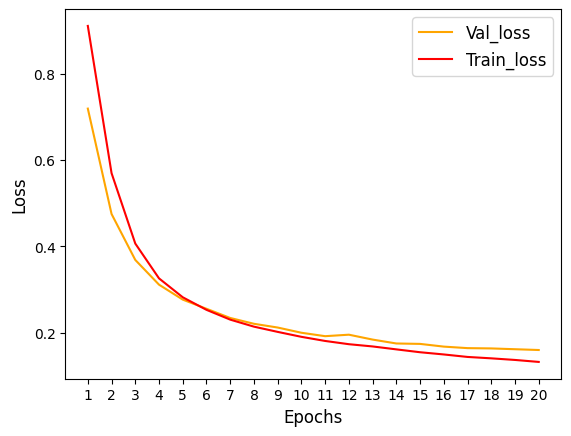

In [103]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')
# plt.plot(history.history['accuracy'], color = 'green')
# plt.plot(history.history['val_accuracy'], color = 'blue')
plt.legend(['Val_loss','Train_loss'],fontsize=12)
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xticks(e,labels,fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [104]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model_potato_avg.predict(x),1).numpy())

1/1 [==============================] - 0s 212ms/step


In [105]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [106]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='macro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='macro') * 100))
print("F1 Score        : {:.2f} %".format(f1_score(labels, predictions, average='macro') * 100))

Train Accuracy  : 95.55 %
Test Accuracy   : 95.16 %
Precision Score : 95.14 %
Recall Score    : 95.20 %
F1 Score        : 95.15 %


<Figure size 200x200 with 0 Axes>

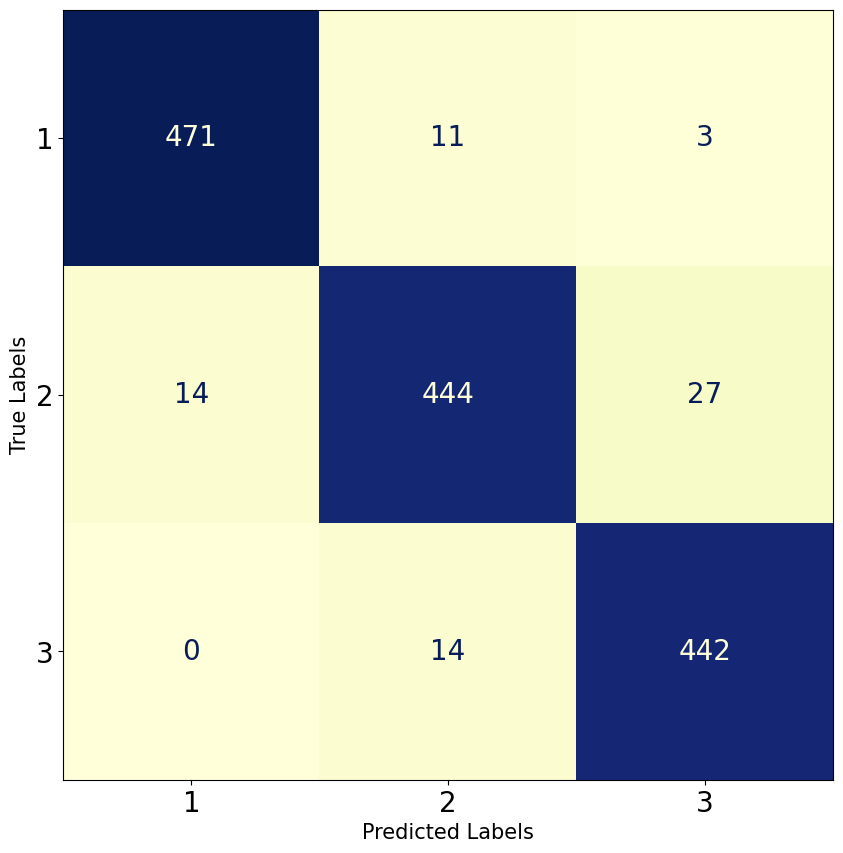

In [107]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
plt.rcParams.update({'font.size': 20})
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,4)))
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
# plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels',fontsize=15)
plt.ylabel('True Labels',fontsize=15)
plt.show()

#**Apple**

In [108]:
data_dir = r"/tmp/DS MINI PROJECT DATASET(BALANCEDANDIMBALANCED)"

train_apple_dir = data_dir + "/Training/Apple"
test_apple_dir = data_dir + "/Testing/Apple"

In [109]:
seed_train_validation = 1 # Must be same for train_ds and val_ds
shuffle_value = True
validation_split = 0.2

train_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_apple_dir,
                                                        image_size = (128, 128),
                                                        label_mode='categorical',
                                                        validation_split = validation_split,
                                                        batch_size=32,
                                                        subset = "training",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

val_gen = tf.keras.utils.image_dataset_from_directory(
                                                        directory = train_apple_dir,
                                                        image_size = (128, 128),
                                                        validation_split = validation_split,
                                                        label_mode='categorical',
                                                        batch_size=32,
                                                        subset = "validation",
                                                        seed = seed_train_validation,
                                                        shuffle = shuffle_value)

test_it = tf.keras.utils.image_dataset_from_directory( directory= test_apple_dir,
                                                      batch_size=32,
                                                      image_size=(128, 128))

Found 7771 files belonging to 4 classes.
Using 6217 files for training.
Found 7771 files belonging to 4 classes.
Using 1554 files for validation.
Found 1943 files belonging to 4 classes.


In [110]:
rescale = Rescaling(scale=1./255)
train_set  = train_gen.map(lambda image,label:(rescale(image),label))
valid_set  = val_gen.map(lambda image,label:(rescale(image),label))
test_set  = test_it.map(lambda image,label:(rescale(image),label))

In [111]:
#from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
def define_modelavg():
    # load model
    model_apple_avg = VGG16(include_top=False, input_shape=(128, 128, 3))
    # mark loaded layers as not trainable
    for layer in model_apple_avg.layers:
        layer.trainable = False
    # add new classifier layers
    avgpool1 = tf.keras.layers.GlobalAveragePooling2D()(model_apple_avg.layers[-1].output)

    class1 = Dense(10, activation='relu', kernel_initializer='he_uniform')(avgpool1)
    output = Dense(4, activation='softmax')(class1)
    # define new model
    model_apple_avg = Model(inputs=model_apple_avg.inputs, outputs=output)
    return model_apple_avg


In [112]:
model_apple_avg = define_modelavg()
model_apple_avg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Metrics.Precision(), Metrics.Recall()])
model_apple_avg.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [113]:
epochsteps=len(train_set);epochs =20;valsteps=len(valid_set);teststeps=len(test_set)
# fit model
history = model_apple_avg.fit(train_set, steps_per_epoch=epochsteps,
                    validation_data=valid_set, validation_steps=valsteps, epochs=20, verbose=1)


Epoch 1/20
195/195 [==============================] - 13s 60ms/step - loss: 0.9622 - accuracy: 0.7066 - precision_1: 0.9428 - recall_1: 0.2545 - val_loss: 0.6608 - val_accuracy: 0.8295 - val_precision_1: 0.9381 - val_recall_1: 0.6532
Epoch 2/20
195/195 [==============================] - 12s 59ms/step - loss: 0.5029 - accuracy: 0.8776 - precision_1: 0.9373 - recall_1: 0.7642 - val_loss: 0.4056 - val_accuracy: 0.8880 - val_precision_1: 0.9379 - val_recall_1: 0.8256
Epoch 3/20
195/195 [==============================] - 11s 58ms/step - loss: 0.3436 - accuracy: 0.9064 - precision_1: 0.9372 - recall_1: 0.8660 - val_loss: 0.3065 - val_accuracy: 0.9060 - val_precision_1: 0.9374 - val_recall_1: 0.8771
Epoch 4/20
195/195 [==============================] - 11s 56ms/step - loss: 0.2662 - accuracy: 0.9228 - precision_1: 0.9428 - recall_1: 0.8990 - val_loss: 0.2569 - val_accuracy: 0.9183 - val_precision_1: 0.9362 - val_recall_1: 0.8977
Epoch 5/20
195/195 [==============================] - 11s 57ms/s

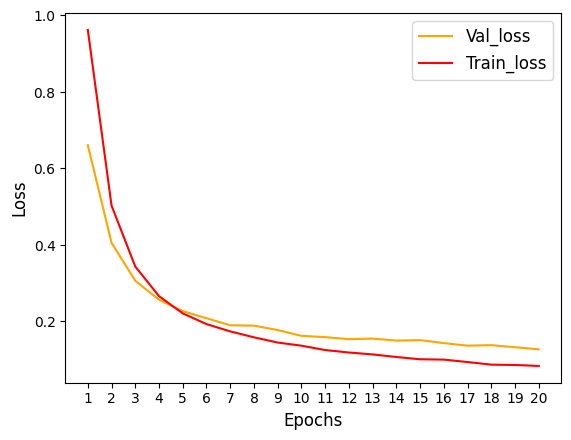

In [114]:
plt.plot(history.history['val_loss'], color = 'orange')
plt.plot(history.history['loss'], color='red')

plt.legend(['Val_loss','Train_loss'],fontsize=12)
e=range(0,20)
labels=range(1,21)
plt.xlabel("Epochs",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xticks(e,labels,fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [115]:
labels = []
predictions = []
for x,y in test_set:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model_apple_avg.predict(x),1).numpy())

1/1 [==============================] - 0s 223ms/step


In [116]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [117]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='macro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='macro') * 100))
print("F1 Score        : {:.2f} %".format(f1_score(labels, predictions, average='macro') * 100))

Train Accuracy  : 97.07 %
Test Accuracy   : 95.83 %
Precision Score : 95.84 %
Recall Score    : 95.83 %
F1 Score        : 95.81 %


<Figure size 200x200 with 0 Axes>

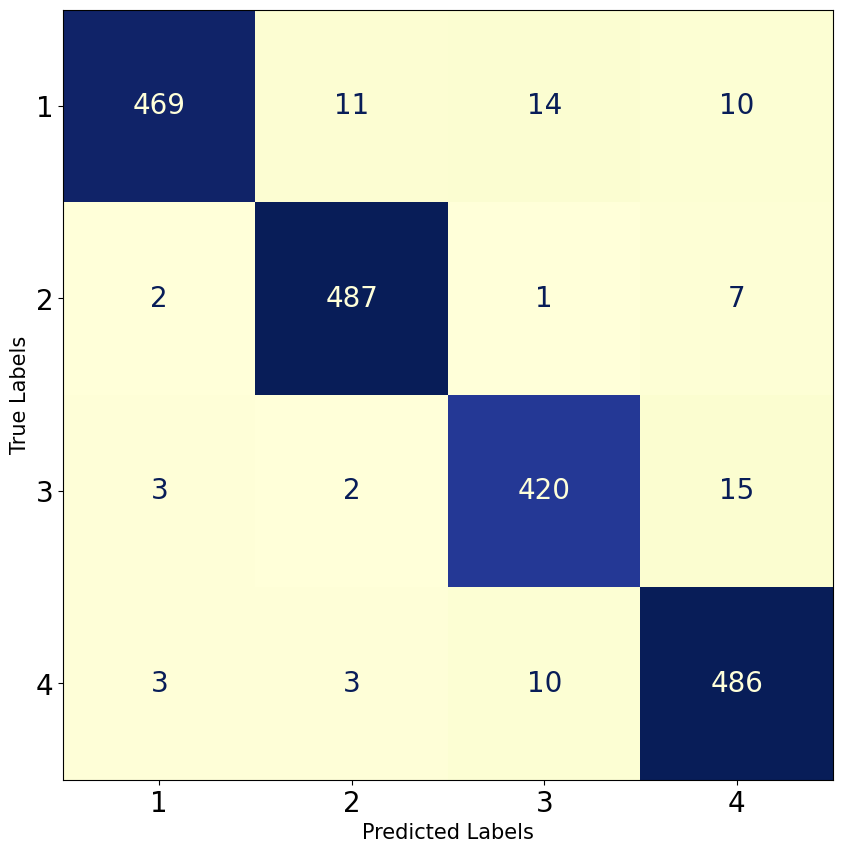

In [118]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (2,2))
cm = confusion_matrix(labels, predictions)
plt.rcParams.update({'font.size': 20})
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,5)))
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
# plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels',fontsize=15)
plt.ylabel('True Labels',fontsize=15)
plt.show()